In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import pickle
import statistics
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the dataset which has the features (gene symbol)
file_path = 'dataset/ADNI_Gene_Expression_Profile.csv'
df1 = pd.read_csv(file_path)

In [4]:
col = df1.columns[3:747]
sampleList = []
for c in col:
    sample = df1.loc[:, c]
    sample = sample.tolist()
    subId = sample[1]
    sample = sample[8:]
    sample.insert(0, subId)
    sampleList.append(sample)

In [5]:
# print(sampleList[2])

In [6]:
# loading the dataset which has the targets (Phenotype)
file_path = 'dataset/Complete_ADNI_clinical_info.csv'
df2 = pd.read_csv(file_path)
# df2.head(10)

In [7]:
tem_col = list(df1.loc[7:,'Phase'])
tem_col[0] = 'IID'

In [8]:
# type(tem_col[52])

In [9]:
# if len(tem_col) != len(set(tem_col)):
#     print("There are duplicate strings in the list.")
# else:
#     print("There are no duplicate strings in the list.")

In [10]:
finalDataFrame = pd.DataFrame(sampleList, columns=tem_col)

In [11]:
finalDataFrame.head()

,IID,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,...,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
0,116_S_1249,2.237,2.624,1.873,2.92,2.147,2.268,2.432,4.6,2.771,...,2.355,2.624,2.010,2.906,2.463,2.050,2.060,1.858,2.028,2.162
1,037_S_4410,2.294,2.416,1.884,2.668,2.156,2.13,2.27,4.547,2.363,...,2.100,2.820,1.726,2.465,2.260,1.933,1.717,2.208,2.058,1.882
2,006_S_4153,2.14,2.322,1.999,3.634,2.516,1.957,2.333,4.442,2.544,...,2.165,2.455,1.840,2.681,2.251,1.985,1.770,2.184,2.007,2.134
3,116_S_1232,2.062,2.5,1.851,3.632,2.283,2.347,2.258,4.608,2.233,...,2.094,2.599,1.837,2.713,2.158,1.916,1.878,2.163,2.185,2.099
4,099_S_4205,2.04,2.395,2.08,3.278,2.251,2.154,2.334,4.536,2.546,...,1.973,2.544,1.909,2.548,2.266,2.077,1.838,2.085,1.941,1.883


In [12]:
finalDataFrame['Age'] = ""
finalDataFrame['Gender'] = ""
finalDataFrame['Ethnicity'] = ""
finalDataFrame['Race'] = ""
finalDataFrame['Phenotype'] = ""

In [13]:
for index, row in finalDataFrame.iterrows():
    patientID = finalDataFrame.at[index, 'IID']
    for index2, row2 in df2.iterrows():
        if df2.at[index2, 'IID'] == patientID:
            finalDataFrame.at[index, 'Age'] = df2.at[index2, 'Age']
            finalDataFrame.at[index, 'Gender'] = df2.at[index2, 'Gender']
            finalDataFrame.at[index, 'Ethnicity'] = df2.at[index2, 'Ethnicity']
            finalDataFrame.at[index, 'Race'] = df2.at[index2, 'Race']
            finalDataFrame.at[index, 'Phenotype'] = df2.at[index2, 'Phenotype']

In [14]:
# # print(type(finalDataFrame['Ethnicity']))
# a = finalDataFrame['Race']
# result = a.value_counts()
# for value, count in result.items():
#     print(f"Value: {value}, Frequency: {count}")

In [15]:
finalDataFrame.replace("", np.nan, inplace=True)
print(sum(finalDataFrame.isna().sum()))

80


In [16]:
finalDataFrame = finalDataFrame[finalDataFrame["Phenotype"].notna()].reset_index(drop=True)
print(sum(finalDataFrame.isna().sum()))

0


In [17]:
# finalDataFrame.head()

In [18]:
for col in finalDataFrame.columns:
    if (
        any(finalDataFrame[col].isna())
        and finalDataFrame[col].isna().value_counts().to_dict().get(True) / len(finalDataFrame[col])
        > 0.90
    ):
        print(col)
        finalDataFrame = finalDataFrame.drop(col, axis=1)

In [19]:
features = finalDataFrame.drop('Phenotype', axis = 1)
target = finalDataFrame['Phenotype']
features = features.drop('IID', axis = 1)

In [20]:
# scaler = MinMaxScaler()

In [21]:
scaler = StandardScaler()

In [22]:
features.head()

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,...,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,Age,Gender,Ethnicity,Race
0,2.237,2.624,1.873,2.92,2.147,2.268,2.432,4.6,2.771,2.931,...,2.463,2.050,2.060,1.858,2.028,2.162,78.8,2.0,0.0,0.0
1,2.294,2.416,1.884,2.668,2.156,2.13,2.27,4.547,2.363,2.548,...,2.260,1.933,1.717,2.208,2.058,1.882,69.1,2.0,0.0,0.0
2,2.14,2.322,1.999,3.634,2.516,1.957,2.333,4.442,2.544,2.814,...,2.251,1.985,1.770,2.184,2.007,2.134,79.3,1.0,0.0,0.0
3,2.062,2.5,1.851,3.632,2.283,2.347,2.258,4.608,2.233,3.156,...,2.158,1.916,1.878,2.163,2.185,2.099,72.1,2.0,0.0,0.0
4,2.04,2.395,2.08,3.278,2.251,2.154,2.334,4.536,2.546,2.864,...,2.266,2.077,1.838,2.085,1.941,1.883,86.4,2.0,0.0,0.0


In [23]:
features = scaler.fit_transform(features)

In [24]:
print(features)

[[-0.92212458  0.78290906 -0.90770843 ...  1.10738417 -0.15595387
  -0.220714  ]
 [-0.63303932 -0.13771981 -0.84554311 ...  1.10738417 -0.15595387
  -0.220714  ]
 [-1.41407669 -0.55377325 -0.19563291 ... -0.90302898 -0.15595387
  -0.220714  ]
 ...
 [-0.55696425  0.70766535  0.23387296 ...  1.10738417 -0.15595387
  -0.220714  ]
 [-0.59246595  0.53947354  0.64077326 ... -0.90302898 -0.15595387
  -0.220714  ]
 [ 1.22826403  1.02634458 -0.03174251 ... -0.90302898 -0.15595387
  -0.220714  ]]


In [25]:
target = target.to_numpy()

In [26]:
print(target[0:10])
target = target.astype(int)
print(target[0:10])

[2. 0. 2. 0. 1. 1. 0. 1. 0. 1.]
[2 0 2 0 1 1 0 1 0 1]


In [27]:
f = finalDataFrame.drop('Phenotype', axis = 1)
f = f.drop('IID', axis = 1)

In [28]:
lasso = Lasso(alpha=0.01)
lasso.fit(features, target)
selectedFeatures = f.columns[lasso.coef_ != 0.0]

In [29]:
len(selectedFeatures)

603

In [30]:
for feature in selectedFeatures:
    print(feature)

11715142_s_at
11715441_a_at
11716131_s_at
11716339_a_at
11716343_a_at
11716380_a_at
11716491_s_at
11716551_s_at
11716575_a_at
11716679_s_at
11716776_a_at
11717215_a_at
11717382_a_at
11717387_x_at
11717406_a_at
11717430_s_at
11717666_a_at
11717794_a_at
11717801_a_at
11717911_x_at
11717995_x_at
11718187_a_at
11718279_at
11718437_at
11718623_a_at
11718731_a_at
11718797_a_at
11718800_at
11719230_at
11719241_x_at
11719248_a_at
11719389_a_at
11719519_at
11719618_a_at
11719621_x_at
11719701_s_at
11719834_a_at
11719898_s_at
11720085_a_at
11720222_at
11720332_a_at
11720421_at
11720549_a_at
11720567_a_at
11720636_s_at
11720671_x_at
11720683_at
11720704_s_at
11720792_a_at
11721227_at
11721303_at
11721372_at
11721394_a_at
11721592_a_at
11721598_a_at
11721895_x_at
11721958_at
11722162_a_at
11722359_x_at
11722504_at
11722559_x_at
11722621_a_at
11722656_s_at
11722896_a_at
11723202_at
11723317_at
11723539_a_at
11723611_at
11723866_a_at
11724044_a_at
11724109_a_at
11724196_s_at
11724261_a_at
11724272_a

In [31]:
type(selectedFeatures)

pandas.core.indexes.base.Index

In [32]:
len(selectedFeatures)

603

In [33]:
featuresForTraining = finalDataFrame.drop('Phenotype', axis = 1)
featuresForTraining = featuresForTraining.drop('IID', axis = 1)

In [34]:
featuresForTraining.head()

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,...,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,Age,Gender,Ethnicity,Race
0,2.237,2.624,1.873,2.92,2.147,2.268,2.432,4.6,2.771,2.931,...,2.463,2.050,2.060,1.858,2.028,2.162,78.8,2.0,0.0,0.0
1,2.294,2.416,1.884,2.668,2.156,2.13,2.27,4.547,2.363,2.548,...,2.260,1.933,1.717,2.208,2.058,1.882,69.1,2.0,0.0,0.0
2,2.14,2.322,1.999,3.634,2.516,1.957,2.333,4.442,2.544,2.814,...,2.251,1.985,1.770,2.184,2.007,2.134,79.3,1.0,0.0,0.0
3,2.062,2.5,1.851,3.632,2.283,2.347,2.258,4.608,2.233,3.156,...,2.158,1.916,1.878,2.163,2.185,2.099,72.1,2.0,0.0,0.0
4,2.04,2.395,2.08,3.278,2.251,2.154,2.334,4.536,2.546,2.864,...,2.266,2.077,1.838,2.085,1.941,1.883,86.4,2.0,0.0,0.0


In [35]:
featuresForTraining = featuresForTraining[selectedFeatures]

In [36]:
featuresForTraining.head()

,11715142_s_at,11715441_a_at,11716131_s_at,11716339_a_at,11716343_a_at,11716380_a_at,11716491_s_at,11716551_s_at,11716575_a_at,11716679_s_at,...,11763870_at,11763901_s_at,11763911_at,11764093_at,11764129_at,11764161_a_at,11764274_s_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,Age
0,2.269,2.214,2.623,5.177,5.561,5.871,3.767,3.833,2.413,1.960,...,2.112,2.291,3.551,2.701,2.605,1.990,2.331,2.060,1.858,78.8
1,2.215,2.275,2.402,5.331,5.634,6.275,3.452,3.701,2.332,2.672,...,2.153,2.472,3.507,2.700,2.548,2.050,2.331,1.717,2.208,69.1
2,2.296,2.423,2.706,4.642,5.293,5.484,4.191,3.657,2.467,2.779,...,2.275,2.463,3.916,2.456,2.484,1.856,2.244,1.770,2.184,79.3
3,2.498,2.466,2.443,4.482,6.125,4.984,4.434,3.457,2.129,2.440,...,2.295,2.737,3.627,2.811,2.426,2.288,2.316,1.878,2.163,72.1
4,2.264,2.372,2.541,4.904,6.130,5.889,4.159,3.894,2.406,2.515,...,2.224,2.479,3.383,2.674,2.600,2.138,2.114,1.838,2.085,86.4


In [37]:
# normalize the selected features 
scaler2 = StandardScaler()
featuresForTraining = scaler2.fit_transform(featuresForTraining)

In [38]:
# type(featuresForTraining[0][0])
# print(type(target[0]))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(featuresForTraining, target, test_size=0.2, random_state=42)

In [40]:
parameterGrid = { 
    'n_estimators': [50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
}

In [41]:
gridSearch = GridSearchCV(RandomForestClassifier(), 
                           param_grid=parameterGrid) 
gridSearch.fit(X_train, y_train) 
print(gridSearch.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)


In [42]:
model = RandomForestClassifier(n_estimators=50, max_depth=9, max_features=None, max_leaf_nodes=9, random_state=42)

In [43]:
len(X_train)

582

In [44]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=50, random_state=42)

In [45]:
y_pred = model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)

In [47]:
print(accuracy)

0.5342465753424658


In [48]:
cm = confusion_matrix(y_test, y_pred)

In [49]:
cmDF = pd.DataFrame(cm,
                     index = ['Control','MCI','AD'], 
                     columns = ['Control','MCI','AD'])

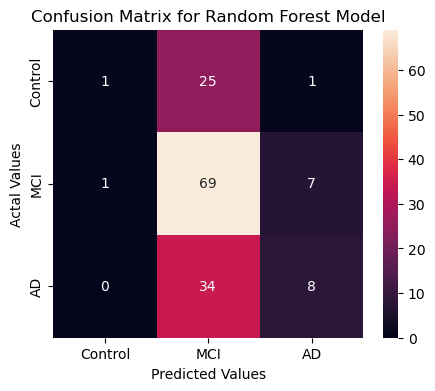

In [50]:
# plotting the confusion matrix to represent the preformance of Random Forest Model
plt.figure(figsize=(5,4))
sns.heatmap(cmDF, annot=True)
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [51]:
# def lassoFeatSel(rs, features, target):
# #     lasso_model = Lasso(alpha=0.01, random_state=rs, selection='cyclic')
#     lasso_model = Lasso(alpha=0.01, random_state=rs)
#     lasso_model.fit(features, target)
#     selectedFet = fff.columns[lasso_model.coef_ != 0.0].tolist()
#     return selectedFet

In [52]:
# for i in range(10):
#     rs = i * 1000 + 42
#     f = lassoFeatSel(rs, features, target)
#     print(len(f))